# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [13]:
df['title'].unique().shape[0]

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [16]:
df['reason']=df['title'].apply(lambda x : x.split(':')[0])
df.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
41183,40.253783,-75.681831,GROSSTOWN RD & SCHOOL LN; WEST POTTSGROVE; 201...,19464.0,Fire: FIRE INVESTIGATION,2016-03-24 17:17:01,WEST POTTSGROVE,GROSSTOWN RD & SCHOOL LN,1,Fire
2373,40.004694,-75.242277,OLD LANCASTER RD & SYCAMORE AVE; LOWER MERION;...,19004.0,Traffic: VEHICLE ACCIDENT -,2015-12-16 17:37:02,LOWER MERION,OLD LANCASTER RD & SYCAMORE AVE,1,Traffic
28687,40.309334,-75.320922,MAIN ST & E BROAD ST; TELFORD; Station 339; 2...,18964.0,EMS: HEAD INJURY,2016-02-19 23:26:00,TELFORD,MAIN ST & E BROAD ST,1,EMS
17066,40.135347,-75.363820,HOOVER AVE & HIGHLAND AVE; WEST NORRITON; Sta...,19403.0,EMS: CVA/STROKE,2016-01-23 14:37:01,WEST NORRITON,HOOVER AVE & HIGHLAND AVE,1,EMS
7252,40.268565,-75.624460,CHARLOTTE ST & ORLANDO RD; UPPER POTTSGROVE; 2...,19464.0,Fire: VEHICLE ACCIDENT,2015-12-29 20:37:01,UPPER POTTSGROVE,CHARLOTTE ST & ORLANDO RD,1,Fire
40690,40.189041,-75.442466,HILDEBIDLE DR & ALLISON CIR; LOWER PROVIDENCE;...,19426.0,Fire: FIRE ALARM,2016-03-23 10:52:00,LOWER PROVIDENCE,HILDEBIDLE DR & ALLISON CIR,1,Fire
63889,40.087285,-75.293087,BUTLER PIKE & E NORTH LN; PLYMOUTH; 2016-05-25...,19428.0,Traffic: VEHICLE ACCIDENT -,2016-05-25 13:12:02,PLYMOUTH,BUTLER PIKE & E NORTH LN,1,Traffic
22376,40.181382,-75.093521,CORINTHIAN AVE & JEFFERSON AVE; HATBORO; 2016-...,19040.0,Fire: BUILDING FIRE,2016-02-03 18:52:01,HATBORO,CORINTHIAN AVE & JEFFERSON AVE,1,Fire
21432,40.294817,-75.537972,BIG RD & COLONIAL RD; UPPER FREDERICK; Statio...,18074.0,EMS: ALTERED MENTAL STATUS,2016-02-01 17:12:00,UPPER FREDERICK,BIG RD & COLONIAL RD,1,EMS
13115,40.153754,-75.121604,EASTON RD & LAWNTON RD; UPPER MORELAND; 2016-0...,19090.0,Traffic: VEHICLE ACCIDENT -,2016-01-13 22:02:01,UPPER MORELAND,EASTON RD & LAWNTON RD,1,Traffic


** What is the most common Reason for a 911 call based off of this new column? **

In [17]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [24]:
# dir(plt.style.available.__contains__)

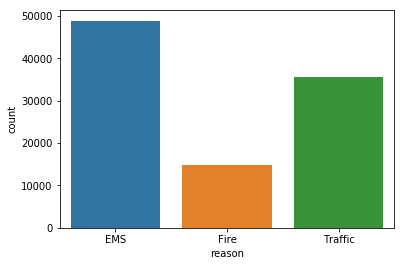

In [25]:
# plt.style.use()
sns.countplot(x='reason', data=df)

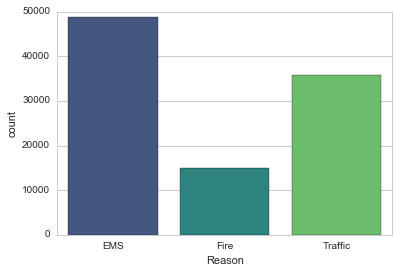

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [30]:
type(df['timeStamp'][0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [37]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
reason       99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [41]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [122]:
(time.day_name())

'Thursday'

In [48]:
df['Hour']=df['timeStamp'].apply(lambda x : x.hour)
df['Month']=df['timeStamp'].apply(lambda x : x.month)
df['Day']=df['timeStamp'].apply(lambda x : x.dayofweek)
df.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day
29450,40.124287,-75.307441,BELVOIR RD & PARK DR; PLYMOUTH; 2016-02-22 @ 0...,19462.0,Fire: CARBON MONOXIDE DETECTOR,2016-02-22 08:27:00,PLYMOUTH,BELVOIR RD & PARK DR,1,Fire,8,2,0
50115,40.037753,-75.317595,ITHAN AVE & POND LN; LOWER MERION; Station 31...,19010.0,EMS: ALTERED MENTAL STATUS,2016-04-17 23:22:00,LOWER MERION,ITHAN AVE & POND LN,1,EMS,23,4,6
33522,40.069616,-75.340427,HOLSTEIN RD & TRINITY LN; UPPER MERION; 2016-0...,19428.0,Traffic: DISABLED VEHICLE -,2016-03-03 08:12:01,UPPER MERION,HOLSTEIN RD & TRINITY LN,1,Traffic,8,3,3
94523,40.238479,-75.229720,HORSHAM RD & RT202 PKWY; MONTGOMERY; 2016-08-1...,19454.0,Traffic: VEHICLE ACCIDENT -,2016-08-11 16:01:03,MONTGOMERY,HORSHAM RD & RT202 PKWY,1,Traffic,16,8,3
68308,40.206081,-75.224618,W WELSH RD & N BETHLEHEM PIKE; LOWER GWYNEDD; ...,19454.0,Traffic: DISABLED VEHICLE -,2016-06-05 17:17:01,LOWER GWYNEDD,W WELSH RD & N BETHLEHEM PIKE,1,Traffic,17,6,6
52871,40.088355,-75.382100,DEKALB PIKE & ALLENDALE RD; UPPER MERION; Sta...,19406.0,EMS: DIZZINESS,2016-04-25 07:52:00,UPPER MERION,DEKALB PIKE & ALLENDALE RD,1,EMS,7,4,0
89434,40.069832,-75.316295,RAMP MATSONFORD RD TO I76 & RAMP MATSONFORD R...,NaN,Traffic: VEHICLE ACCIDENT -,2016-07-29 12:11:01,WEST CONSHOHOCKEN,RAMP MATSONFORD RD TO I76 & RAMP MATSONFORD R...,1,Traffic,12,7,4
59865,40.107918,-75.163347,EDGE HILL RD & LIMEKILN PIKE; ABINGTON; Stati...,19038.0,EMS: ALTERED MENTAL STATUS,2016-05-14 12:07:47,ABINGTON,EDGE HILL RD & LIMEKILN PIKE,1,EMS,12,5,5
16307,40.184797,-75.286879,TWIN SILO DR & MORRIS RD; WHITPAIN; Station 3...,19422.0,EMS: VEHICLE ACCIDENT,2016-01-22 14:21:00,WHITPAIN,TWIN SILO DR & MORRIS RD,1,EMS,14,1,4
81406,40.121009,-75.350601,MARSHALL ST & KOHN ST; NORRISTOWN; 2016-07-09 ...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-07-09 19:42:00,NORRISTOWN,MARSHALL ST & KOHN ST,1,Traffic,19,7,5


In [49]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_name']=df['Day'].map(dmap)
df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Day_name
80250,40.011032,-75.293152,MONTGOMERY AVE & VALLEY RD; LOWER MERION; 2016...,19003.0,Fire: WOODS/FIELD FIRE,2016-07-06 16:31:41,LOWER MERION,MONTGOMERY AVE & VALLEY RD,1,Fire,16,7,2,Wed
53440,40.239436,-75.236238,HORSHAM RD & DOYLESTOWN PIKE; MONTGOMERY; 2016...,NaN,Traffic: VEHICLE ACCIDENT -,2016-04-26 15:02:01,MONTGOMERY,HORSHAM RD & DOYLESTOWN PIKE,1,Traffic,15,4,1,Tue
68740,40.175347,-75.174160,WELSH RD & TERRACE DR; HORSHAM; 2016-06-06 @ 1...,19002.0,Traffic: VEHICLE ACCIDENT -,2016-06-06 17:07:02,HORSHAM,WELSH RD & TERRACE DR,1,Traffic,17,6,0,Mon
71548,40.259415,-75.324620,ALLENTOWN RD & FORTY FOOT RD; TOWAMENCIN; 2016...,19446.0,Fire: WOODS/FIELD FIRE,2016-06-13 11:22:00,TOWAMENCIN,ALLENTOWN RD & FORTY FOOT RD,1,Fire,11,6,0,Mon
95390,40.008781,-75.222940,LINDY LN & RIGHTERS FERRY RD; LOWER MERION; S...,19004.0,EMS: RESPIRATORY EMERGENCY,2016-08-13 17:27:01,LOWER MERION,LINDY LN & RIGHTERS FERRY RD,1,EMS,17,8,5,Sat


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

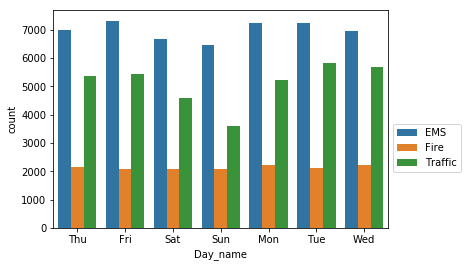

In [54]:
sns.countplot(x='Day_name', data=df,hue='reason')
plt.legend(bbox_to_anchor=(1,0.5))

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

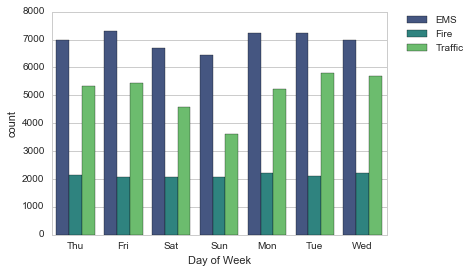

**Now do the same for Month:**

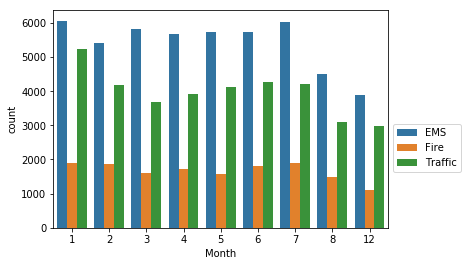

In [57]:
sns.countplot(x='Month', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1,0.5))

In [58]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

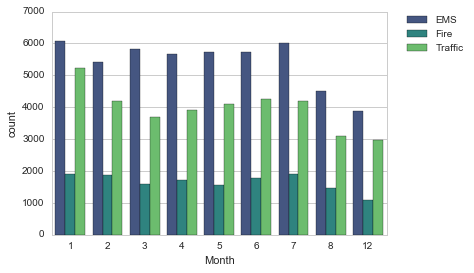

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [80]:
df_gm=df.groupby(['Month']).count()
df_gm

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,Day_name
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

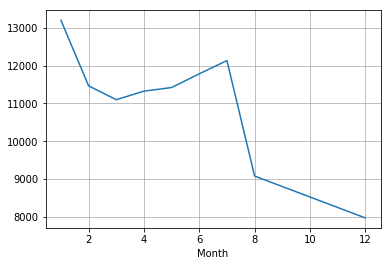

In [68]:
df.groupby(['Month']).count()['e'].plot(grid=True)

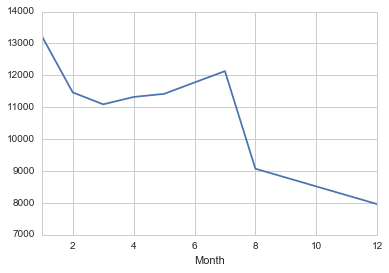

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [88]:
df_gm.reset_index(inplace=True)

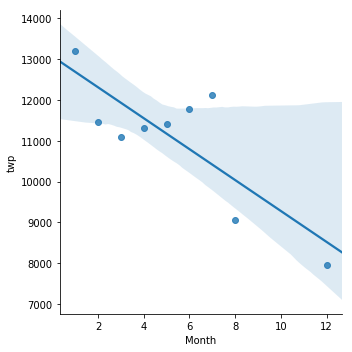

In [92]:
sns.lmplot(x='Month',y='twp',data=df_gm)


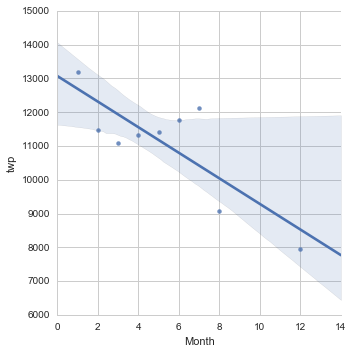

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [95]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Day_name,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [97]:
df_date=df.groupby('Date').count()
df_date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Day_name
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


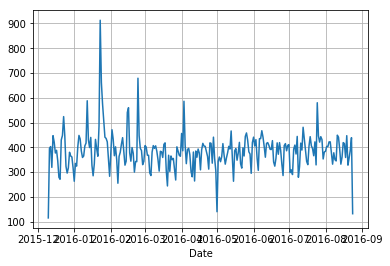

In [100]:
df_date['e'].plot(grid=True)

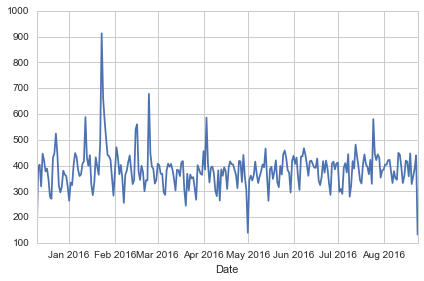

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [102]:
df_date_reason=df.groupby(['Date','reason']).count()
df_date_reason

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Date       reason                                                           
2015-12-10 EMS       57   57    57   52     57         57   57    57   57   
           Fire      15   15    15   13     15         15   15    15   15   
           Traffic   43   43    43   35     43         43   43    41   43   
2015-12-11 EMS      186  186   186  166    186        186  186   186  186   
           Fire      69   69    69   59     69         69   68    68   69   
           Traffic  141  141   141  108    141        141  141   137  141   
2015-12-12 EMS      189  189   189  171    189        189  189   189  189   
           Fire      68   68    68   53     68         68   68    68   68   
           Traffic  146  146   146  109    146        146  146   144  146   
2015-12-13 EMS      190  190   190  178    190        190  190   190  190   
           Fire      51   51    51   48     51         51   51    51   51   
           Traffic   78   78    78   54     78         78   78    76   78   
2015-12-14 EMS      222  222   222  201    222        222  222   222  222   
           Fire      39   39    39   36     39         39   38    39   39   
           Traffic  186  186   186  150    186        186  186   184  186   
2015-12-15 EMS      195  195   195  180    195        195  194   195  195   
           Fire      43   43    43   40     43         43   43    43   43   
           Traffic  183  183   183  160    183        183  183   181  183   
2015-12-16 EMS      192  192   192  185    192        192  192   192  192   
           Fire      53   53    53   47     53         53   53    53   53   
           Traffic  132  132   132  111    132        132  132   131  132   
2015-12-17 EMS      166  166   166  151    166        166  166   166  166   
           Fire      55   55    55   45     55         55   55    55   55   
           Traffic  167  167   167  140    167        167  167   166  167   
2015-12-18 EMS      164  164   164  151    164        164  164   164  164   
           Fire      34   34    34   32     34         34   34    34   34   
           Traffic  148  148   148  123    148        148  148   148  148   
2015-12-19 EMS      123  123   123  114    123        123  123   123  123   
           Fire      48   48    48   44     48         48   48    48   48   
           Traffic  108  108   108   81    108        108  108   101  108   
...                 ...  ...   ...  ...    ...        ...  ...   ...  ...   
2016-08-15 EMS      192  192   192  176    192        192  191   192  192   
           Fire      54   54    54   45     54         54   54    54   54   
           Traffic  114  114   114   96    114        114  114   111  114   
2016-08-16 EMS      213  213   213  193    213        213  213   213  213   
           Fire      65   65    65   57     65         65   65    65   65   
           Traffic  141  141   141  111    141        141  141   138  141   
2016-08-17 EMS      184  184   184  163    184        184  184   184  184   
           Fire      62   62    62   55     62         62   62    62   62   
           Traffic  169  169   169  145    169        169  169   164  169   
2016-08-18 EMS      152  152   152  134    152        152  152   152  152   
           Fire      61   61    61   53     61         61   60    60   61   
           Traffic  146  146   146  118    146        146  146   145  146   
2016-08-19 EMS      209  209   209  181    209        209  209   209  209   
           Fire      67   67    67   56     67         67   67    67   67   
           Traffic  171  171   171  143    171        171  171   170  171   
2016-08-20 EMS      159  159   159  139    159        159  159   159  159   
           Fire      52   52    52   47     52         52   52    52   52   
           Traffic  117  117   117   93    117        117  117   116  117   
2016-08-21 EMS      165  165   165  144    165        165  165   165  165   
           Fire 

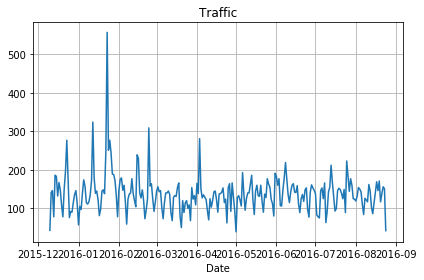

In [147]:
df_date_reason.xs('Traffic', level='reason')['lat'].plot(grid=True)
plt.title('Traffic')
plt.tight_layout()

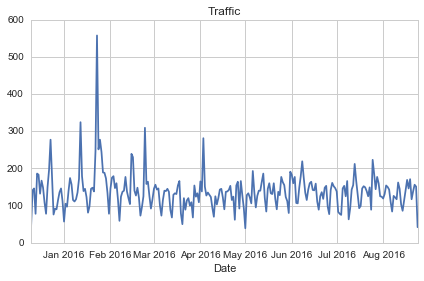

Text(0.5, 1.0, 'Fire')

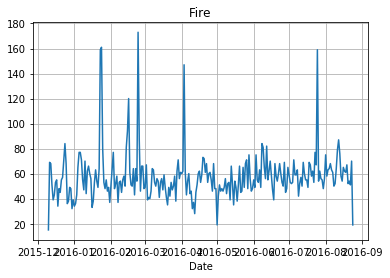

In [128]:
df_date_reason.xs('Fire', level='reason')['lat'].plot(grid=True)
plt.title('Fire')

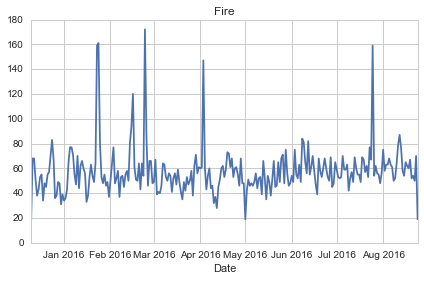

Text(0.5, 1.0, 'EMS')

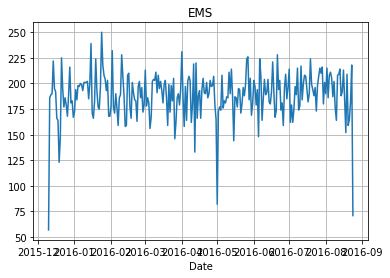

In [126]:
df_date_reason.xs('EMS', level='reason')['lat'].plot(grid=True)
plt.title('EMS')

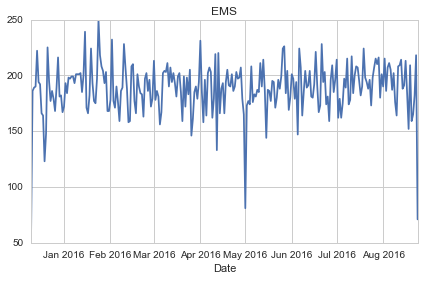

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [149]:
dayHour = df.groupby(by=['Day_name','Hour']).count()
dayHour.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
Day_name Hour                                                                  
Fri      0     275  275   275  248    275        275  275   275  275     275   
         1     235  235   235  200    235        235  235   232  235     235   
         2     191  191   191  165    191        191  191   191  191     191   
         3     175  175   175  164    175        175  175   175  175     175   
         4     201  201   201  184    201        201  201   201  201     201   

               Month  Day  Date  
Day_name Hour                    
Fri      0       275  275   275  
         1       235  235   235  
         2       191  191   191  
         3       175  175   175  
         4       201  201   201

In [153]:
dayHour = df.groupby(by=['Day_name','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [136]:
pivot_data=df.pivot_table(index='Day_name', columns='Hour', values='Day',aggfunc='count')
pivot_data
##count the number of days which have same day and hour 

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

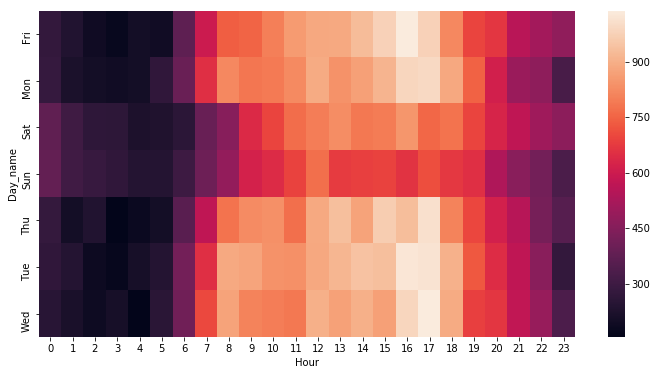

In [140]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_data)

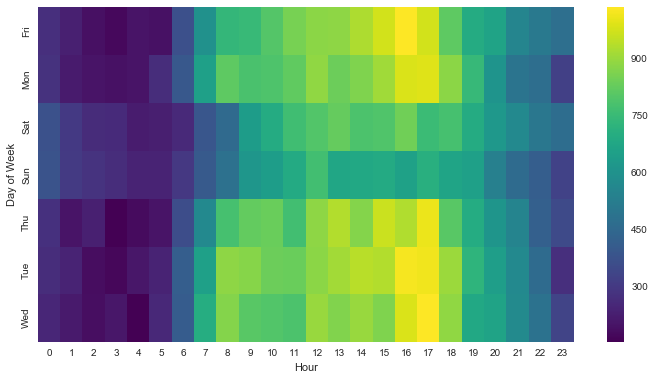

** Now create a clustermap using this DataFrame. **

<Figure size 864x432 with 0 Axes>

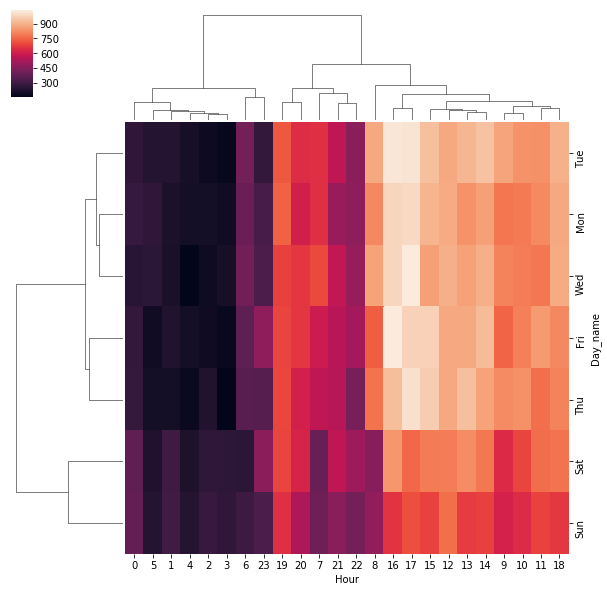

In [142]:
plt.figure(figsize=(12,6))
sns.clustermap(pivot_data)

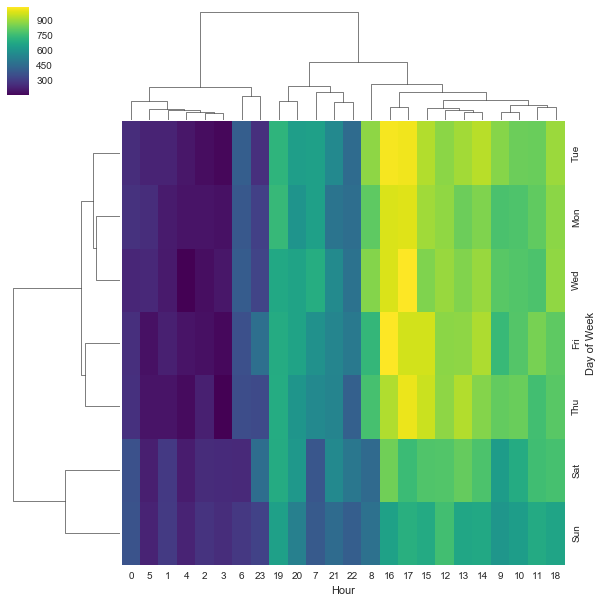

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [143]:
pivot_data1=df.pivot_table(index='Day_name', columns='Month', values='Day',aggfunc='count')
pivot_data1

Month,1,2,3,4,5,6,7,8,12
Day_name,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


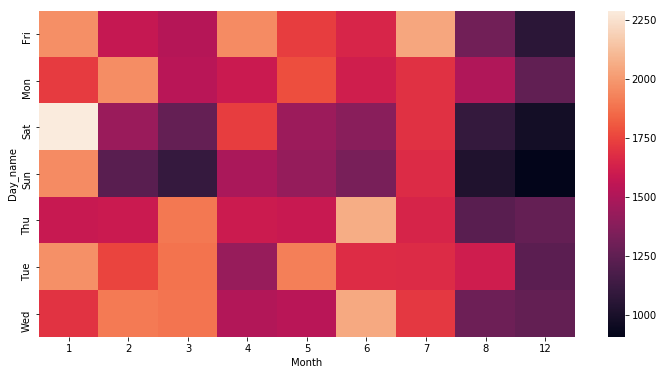

In [144]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_data1)

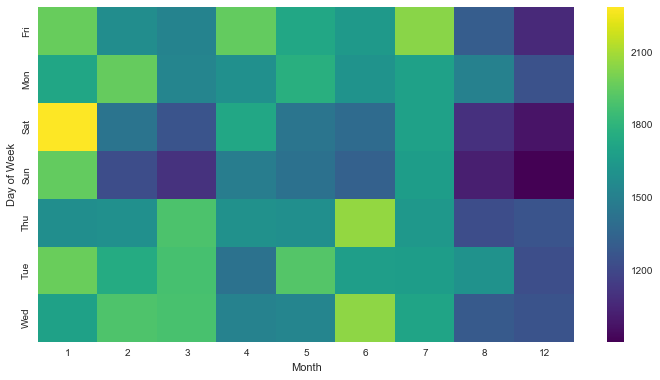

<Figure size 864x432 with 0 Axes>

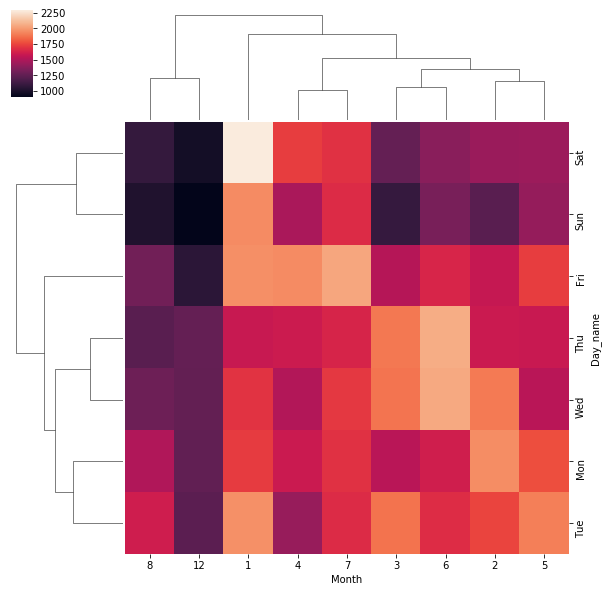

In [146]:
plt.figure(figsize=(12,6))
sns.clustermap(pivot_data1,)

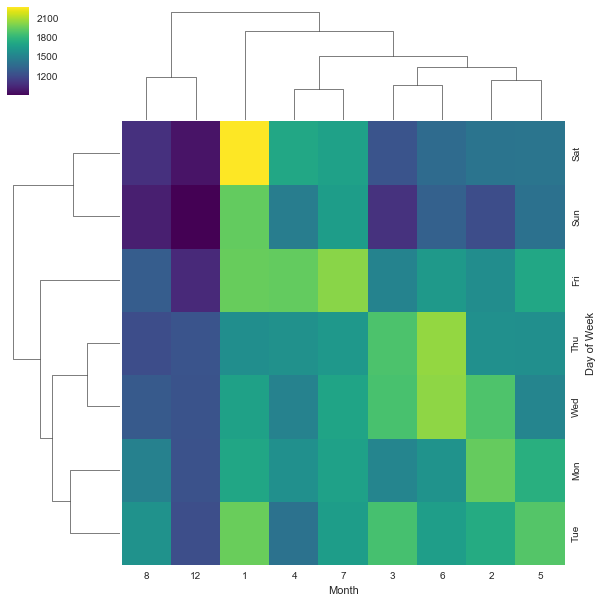

**Continue exploring the Data however you see fit!**
# Great Job!